## Reviewing and transforming the data

In [1]:
!pip install --user --upgrade numpy==1.18.0

In [2]:
!python -m pip install --upgrade pip

In [3]:
!pip install tensorflow==2.3.0 --user

In [4]:
import tensorflow as tf

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing import text, sequence

In [7]:
import pandas as pd
fake_news = pd.read_csv("../iecoe-sg-technical-interview/Fake.csv")
real_news = pd.read_csv("../iecoe-sg-technical-interview/True.csv")
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
fake_news['category'] = 0
real_news['category'] = 1

In [10]:
merged_news = pd.concat([fake_news,real_news])
merged_news

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [11]:
merged_news.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [12]:
merged_news['text'] = merged_news['text'] + " " + merged_news['title']
del merged_news['title']
del merged_news['subject']
del merged_news['date']

## General models and feature engineering

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(merged_news['text'], merged_news['category'], 
                                                    random_state=0, stratify=merged_news['category'])

### Testing out various feature engineering methods on a Logistic Regression Model

In [14]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))
print('F1_score: ', metrics.f1_score(y_test, predictions, labels=[0, 1]))

C:\Users\Hazel Tan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC:  0.997110265172635
[[5859   12]
 [  20 5334]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5871
           1       1.00      1.00      1.00      5354

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

F1_score:  0.9970093457943926


In [15]:
# TFIDFVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=5).fit(X_train)
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))
print('F1_score: ', metrics.f1_score(y_test, predictions, labels=[0, 1]))

AUC:  0.9888857001296776
[[5803   68]
 [  57 5297]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5871
           1       0.99      0.99      0.99      5354

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

F1_score:  0.9883384644089933


In [16]:
# Ngrams
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))
print('F1_score: ', metrics.f1_score(y_test, predictions, labels=[0, 1]))

C:\Users\Hazel Tan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


AUC:  0.9976788176526231
[[5858   13]
 [  13 5341]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5871
           1       1.00      1.00      1.00      5354

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

F1_score:  0.9975719088531939


From the tests it can be seen that Logistic Regression using Ngrams feature engineering achieved the highest F1 score. 

### Testing out various feature engineering methods on a Naive Bayes Model

In [17]:
# CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer() 
X_train_transformed = vectorizer.fit_transform(X_train) 
X_test_transformed = vectorizer.transform(X_test)

clf = MultinomialNB(alpha=0.1) 
clf.fit(X_train_transformed, y_train)

y_predicted = clf.predict(X_test_transformed)
print('AUC: ', roc_auc_score(y_test, y_predicted))

from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predicted, labels=[0, 1]))
print(metrics.classification_report(y_test, y_predicted, labels=[0, 1]))
print('F1_score: ', metrics.f1_score(y_test, y_predicted, labels=[0, 1]))

AUC:  0.9558699373092273
[[5616  255]
 [ 240 5114]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5871
           1       0.95      0.96      0.95      5354

    accuracy                           0.96     11225
   macro avg       0.96      0.96      0.96     11225
weighted avg       0.96      0.96      0.96     11225

F1_score:  0.9538375454630235


In [18]:
# TFIDFVectorizer
vectorizer = TfidfVectorizer(min_df=3)
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_transformed, y_train)

y_predicted = clf.predict(X_test_transformed)
print('AUC: ', roc_auc_score(y_test, y_predicted))

print(metrics.confusion_matrix(y_test, y_predicted, labels=[0, 1]))
print(metrics.classification_report(y_test, y_predicted, labels=[0, 1]))
print('F1_score: ', metrics.f1_score(y_test, y_predicted, labels=[0, 1]))

AUC:  0.9404985325451001
[[5566  305]
 [ 359 4995]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5871
           1       0.94      0.93      0.94      5354

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225

F1_score:  0.9376759902384081


In [19]:
# Ngrams
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vectorizer = CountVectorizer(min_df=5, ngram_range=(1,2))
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_transformed, y_train)

y_predicted = clf.predict(X_test_transformed)
print('AUC: ', roc_auc_score(y_test, y_predicted))

print(metrics.confusion_matrix(y_test, y_predicted, labels=[0, 1]))
print(metrics.classification_report(y_test, y_predicted, labels=[0, 1]))
print('F1_score: ', metrics.f1_score(y_test, y_predicted, labels=[0, 1]))

AUC:  0.9688108808311584
[[5689  182]
 [ 168 5186]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5871
           1       0.97      0.97      0.97      5354

    accuracy                           0.97     11225
   macro avg       0.97      0.97      0.97     11225
weighted avg       0.97      0.97      0.97     11225

F1_score:  0.9673568364111172


From the tests it can be seen that the Naive Bayes model using Ngrams feature engineering achieved the highest F1 score. But overall the logistic regression model had the higher score of 0.99785.

## NLP using GloVe Embeddings

In [20]:
import nltk

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Hazel
[nltk_data]     Tan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [23]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
merged_news['text']=merged_news['text'].apply(denoise_text)

In [24]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(merged_news.text)

In [25]:
from collections import Counter
counter = Counter(corpus)
most_common = counter.most_common(10)
most_common = dict(most_common)
most_common

{'Trump': 111503,
 'said': 93162,
 'would': 54613,
 'U.S.': 50441,
 'President': 33180,
 'people': 33115,
 'also': 30325,
 'one': 29370,
 'Donald': 27795,
 'said.': 26194}

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [27]:
x_train,x_test,y_train,y_test = train_test_split(merged_news.text,merged_news.category,random_state = 0)

In [28]:
x_train

13637    Arizona Democratic lawmaker voted welfare frau...
18940    PARIS (Reuters) France warned Iraq Kurdish reg...
14435    DHAKA (Reuters) Bangladesh negotiations Myanma...
3321     secret Donald Trump fan wind farms, especially...
2345     may beginning end Donald Trump tenure *preside...
                               ...                        
6922     WASHINGTON (Reuters) President-elect Donald Tr...
21243    took 14 years happen? 9-11-01 memory etched mi...
19132    BEIRUT (Reuters) U.S.-backed Syrian militias s...
20086    NAIROBI (Reuters) Observers found technical pr...
2732     protect America terrorist threats even exist, ...
Name: text, Length: 33673, dtype: object

In [29]:
max_features = 10000
maxlen = 300

In [30]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [31]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [32]:
EMBEDDING_FILE = '../iecoe-sg-technical-interview/glove.twitter.27B.100d.txt'

In [33]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding="utf8"))

In [34]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

C:\Users\Hazel Tan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [35]:
batch_size = 256
epochs = 10
embed_size = 100

In [36]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [37]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 300, 128)          117248    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [39]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/10
132/132 [==============================] - 1013s 8s/step - loss: 0.1536 - accuracy: 0.9351 - val_loss: 0.0249 - val_accuracy: 0.9934
Epoch 2/10
132/132 [==============================] - 1314s 10s/step - loss: 0.0188 - accuracy: 0.9944 - val_loss: 0.0315 - val_accuracy: 0.9895
Epoch 3/10
132/132 [==============================] - 1476s 11s/step - loss: 0.0121 - accuracy: 0.9960 - val_loss: 0.0109 - val_accuracy: 0.9969
Epoch 4/10
132/132 [==============================] - 1561s 12s/step - loss: 0.0095 - accuracy: 0.9971 - val_loss: 0.0091 - val_accuracy: 0.9976
Epoch 5/10
132/132 [==============================] - 1732s 13s/step - loss: 0.0126 - accuracy: 0.9963 - val_loss: 0.0160 - val_accuracy: 0.9959
Epoch 6/10
132/132 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9969 
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
132/132 [==============================] - 1795s 14s/step - loss: 0.0102 - accuracy: 0.9969 - val_lo

In [40]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1053/1053 [==============================] - 204s 194ms/step - loss: 1.5208e-04 - accuracy: 1.0000
Accuracy of the model on Training Data is -  100.0 %
351/351 [==============================] - 69s 197ms/step - loss: 0.0048 - accuracy: 0.9988
Accuracy of the model on Testing Data is -  99.8752772808075 %


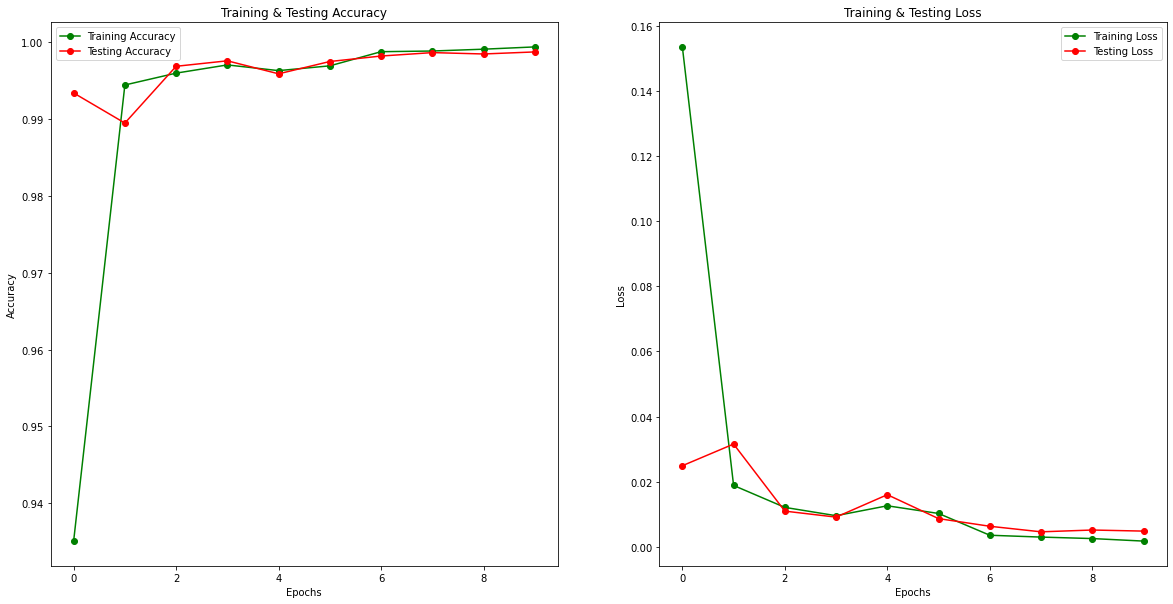

In [41]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [42]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [43]:
print(classification_report(y_test, pred, target_names = ['Fake','Not Fake']))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      5876
    Not Fake       1.00      1.00      1.00      5349

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [44]:
cm = confusion_matrix(y_test,pred)
cm

array([[5867,    9],
       [   5, 5344]], dtype=int64)

In [45]:
print('F1_score: ', metrics.f1_score(y_test, pred, labels=[0, 1]))

F1_score:  0.9986918333021865


NLP using GloVe Embeddings. The F1_score for this model is 99.8%. 

In [75]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import re 
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns 
plt.style.use('ggplot')

In [76]:
fake_news = pd.read_csv("../iecoe-sg-technical-interview/Fake.csv")
real_news = pd.read_csv("../iecoe-sg-technical-interview/True.csv")

In [77]:
fake_news.drop(['date', 'subject'], axis=1, inplace=True)
real_news.drop(['date', 'subject'], axis=1, inplace=True)

In [78]:
fake_news['class'] = 0 
real_news['class'] = 1

In [79]:
news_df = pd.concat([fake_news, real_news], ignore_index=True, sort=False)
news_df

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [80]:
news_df['text'] = news_df['title'] + " " + news_df['text']
news_df.drop('title', axis=1, inplace=True)

In [81]:
features = news_df['text']
targets = news_df['class']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)

In [82]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

X_train = normalize(X_train)
X_test = normalize(X_test)

In [83]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [84]:
# tokenize the text into vectors 
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [85]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)

In [86]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         49664     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                18560     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 390,401
Trainable params: 390,401
Non-trainable params: 0
________________________________________________

In [87]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/10
1078/1078 [==============================] - 585s 543ms/step - loss: 0.2554 - accuracy: 0.8748 - val_loss: 0.0688 - val_accuracy: 0.9752
Epoch 2/10
1078/1078 [==============================] - 592s 550ms/step - loss: 0.0553 - accuracy: 0.9851 - val_loss: 0.0377 - val_accuracy: 0.9864
Epoch 3/10
1078/1078 [==============================] - 606s 562ms/step - loss: 0.0295 - accuracy: 0.9933 - val_loss: 0.0431 - val_accuracy: 0.9864
Epoch 4/10
1078/1078 [==============================] - 595s 552ms/step - loss: 0.0177 - accuracy: 0.9959 - val_loss: 0.0389 - val_accuracy: 0.9880


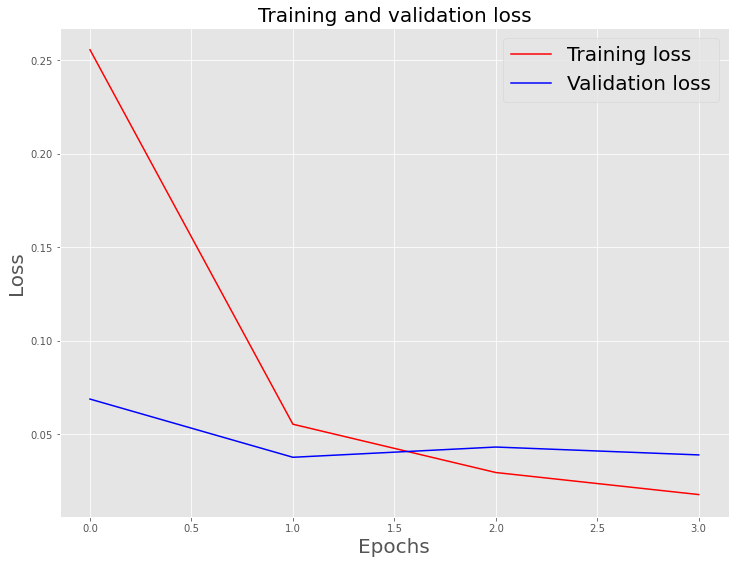

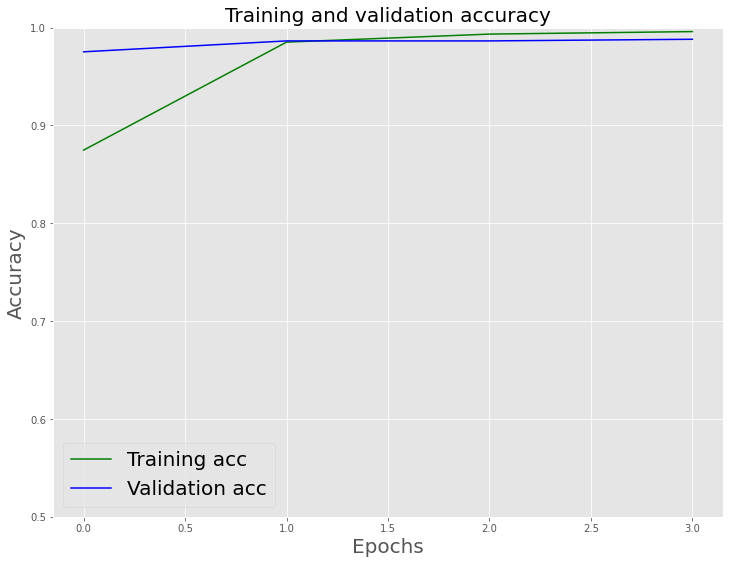

In [88]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [89]:
model.evaluate(X_test, y_test)

281/281 [==============================] - 50s 178ms/step - loss: 0.0411 - accuracy: 0.9871


[0.04106411710381508, 0.9870824217796326]

In [90]:
pred = model.predict(X_test)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [92]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))
print('F1_score on testing set:', metrics.f1_score(binary_predictions, y_test))

Accuracy on testing set: 0.9870824053452116
Precision on testing set: 0.9812413154238073
Recall on testing set: 0.9918071161048689
F1_score on testing set: 0.9864959254947613


Recurrent Neural Networks for Binary Text Classification. The F1 Score is 98.6%

# Summary

Overall I tested out several modes of NLP for the Binary Text Classification Task. 

Logistic Regression
- CountVectorizer: 99.7%
- TIDFVectorizer: 98.8%
- Ngrams: 99.7%

Naive Bayes
- CountVectorizer: 95.3%
- TIDFVectorizer: 93.8%
- Ngrams: 96.7%

NLP with GloVe Embeddings: 99.8%

RNN : 98.6%

The idea for the first portion was to try out different modes of feature engineering to find out which one worked best.
Subsequently I moved on to more in depth methods, moving away from simple logistic regression and naive bayes. The second model involved the use of the GloVe corpus and LSTM. The GloVe corpus is useful for obtaining vector representations of words and will form the embedding layer of the neural network. The subsequent part of the network uses LSTM which is a often used model for classification problems. These layers help to solve the problem of Vanishing gradient and allows the model to predict the next word using recent past memory. 
The last model used the basic RNN model. It passes the outputs from one timestep as inputs to the next timestep. The Bidirectional layers in the model propagates the input forward and backwards through the RNN layer and then concatenates the final output.  